# Import matplotlib and numpy modules

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [93]:
# read original images

image1 = plt.imread('../images/1.bmp') # Cow
image2 = plt.imread('../images/2.bmp') # Parrot
image3 = plt.imread('../images/3.bmp') # Boat

red_1 = image1[:, :, 0]
green_1 = image1[:, :, 1]
blue_1 = image1[:, :, 2]

red_2 = image2[:, :, 0]
green_2 = image2[:, :, 1]
blue_2 = image2[:, :, 2]

red_3 = image3[:, :, 0]
green_3 = image3[:, :, 1]
blue_3 = image3[:, :, 2]

# Compression functions

In [83]:
def minimized_svd(M, k : int):
    u, s, vh = np.linalg.svd(M)
    u = u[:, :k]
    s = s[:k]
    vh = vh[:k, :]
    return u, s, vh

In [106]:
def compress_image(k : int, filename : str):
    img = plt.imread(filename)
    
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    r_u, r_s, r_vh = minimized_svd(r, k)
    g_u, g_s, g_vh = minimized_svd(g, k)
    b_u, b_s, b_vh = minimized_svd(b, k)
    
    new_r = r_u @ np.diag(r_s) @ r_vh
    new_g = g_u @ np.diag(g_s) @ g_vh
    new_b = b_u @ np.diag(b_s) @ b_vh
    
    result = np.concatenate((np.atleast_3d(new_r), np.atleast_3d(new_g), np.atleast_3d(new_b)), axis=2)
    
    return result

In [117]:
# constant which define k
constant = 250
res1 = compress_image(k=constant, filename='../images/1.bmp').astype(np.uint8)
res2 = compress_image(k=constant, filename='../images/2.bmp').astype(np.uint8)
res3 = compress_image(k=constant, filename='../images/3.bmp').astype(np.uint8)

(-0.5, 1919.5, 1279.5, -0.5)

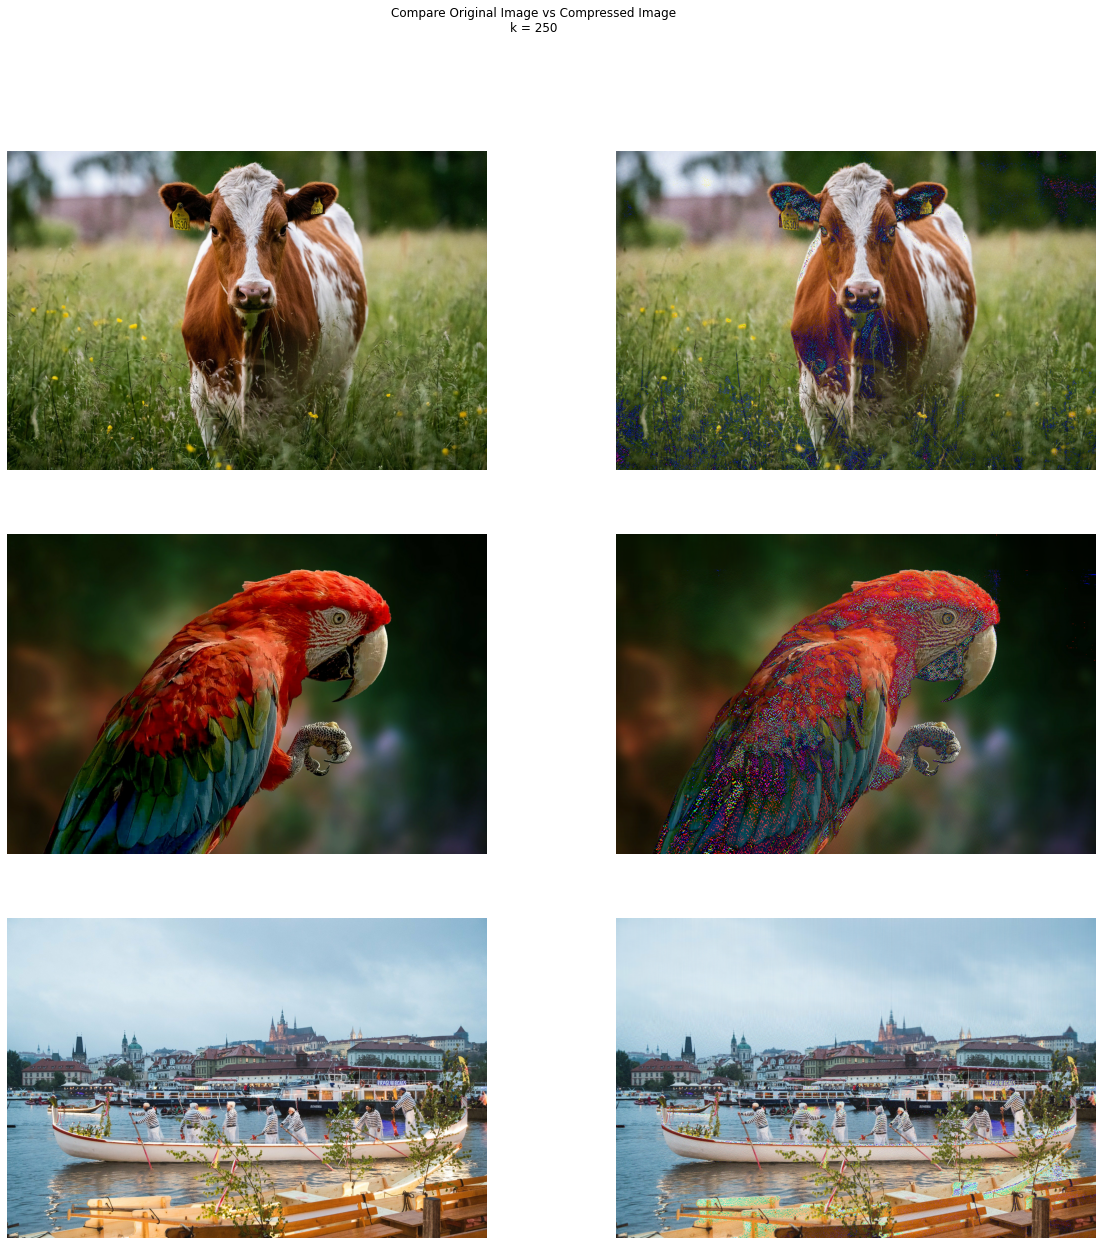

In [118]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle(f'Compare Original Image vs Compressed Image\nk = {constant}')
ax[0, 0].imshow(np.concatenate((np.atleast_3d(red_1), np.atleast_3d(green_1), np.atleast_3d(blue_1)), axis=2))
ax[0, 0].axis('off')
ax[0, 1].imshow(res1)
ax[0, 1].axis('off')

ax[1, 0].imshow(np.concatenate((np.atleast_3d(red_2), np.atleast_3d(green_2), np.atleast_3d(blue_2)), axis=2))
ax[1, 0].axis('off')
ax[1, 1].imshow(res2)
ax[1, 1].axis('off')

ax[2, 0].imshow(np.concatenate((np.atleast_3d(red_3), np.atleast_3d(green_3), np.atleast_3d(blue_3)), axis=2))
ax[2, 0].axis('off')
ax[2, 1].imshow(res3)
ax[2, 1].axis('off')

In [119]:
plt.imsave(f'../compressed_images/image1_{constant}.bmp', res1)
plt.imsave(f'../compressed_images/image2_{constant}.bmp', res2)
plt.imsave(f'../compressed_images/image3_{constant}.bmp', res3)